In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from fim import apriori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv("credit.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
#semantic 

In [3]:
purpose=df["Purpose"].replace("other", "Other")  #sostituito
df["Purpose"]=purpose
Ownership= df["Home Ownership"].replace ("HaveMortgage", "Home Mortgage")
df["Home Ownership"]= Ownership

In [5]:
#Missing Value

In [4]:
df.shape

(100514, 19)

In [5]:
df_srm=df.dropna(axis=0, how='all') #srm=senza righe mancanti;
df_srm.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [6]:
df_srm['Maximum Open Credit'] = df_srm['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])
df_srm['Tax Liens'] = df_srm['Tax Liens'].fillna(df['Tax Liens'].mode()[0])
df_srm['Bankruptcies'] = df_srm['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
df_srm['Years in current job'] = df_srm['Years in current job'].fillna(df['Years in current job'].mode()[0])
df_srm['Credit Score']=df_srm['Credit Score'].fillna(df['Credit Score'].mean())
df_srm['Annual Income']=df_srm['Annual Income'].fillna(df['Annual Income'].mean())
del df_srm['Months since last delinquent']
del df_srm['Loan ID']
del df_srm[ 'Customer ID']
df_srm.isnull().sum()

C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [7]:
# OUTLIERS

In [8]:
df1 = df_srm.copy()
Q3 = df_srm.quantile(0.95)
Q1 = df_srm.quantile(0.25)
IQR = Q3 - Q1
print(IQR)
df = df1[~((df1 >(Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.isnull().sum()

Current Loan Amount          9.982035e+07
Credit Score                 3.654561e+02
Annual Income                1.705691e+06
Monthly Debt                 3.026345e+04
Years of Credit History      1.820000e+01
Number of Open Accounts      1.200000e+01
Number of Credit Problems    1.000000e+00
Current Credit Balance       6.480710e+05
Maximum Open Credit          1.366783e+06
Bankruptcies                 1.000000e+00
Tax Liens                    0.000000e+00
dtype: float64
(91696, 16)


Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [9]:
df.shape

(91696, 16)

In [10]:
#Applico il binning

In [11]:
df['Current Loan Amount Bin'] = pd.cut(df['Current Loan Amount'].astype(int), 10, right=False)
df['Credit Score Bin'] = pd.cut(df['Credit Score'].astype(int), 10, right=False)
df['Annual Income Bin'] = pd.cut(df['Annual Income'].astype(int), 10, right=False)
df['Monthly Debt Bin'] = pd.cut(df['Monthly Debt'].astype(int), 10, right=False)
df['Years of Credit History Bin'] = pd.cut(df['Years of Credit History'].astype(int), 10, right=False)
df['Current Credit Balance Bin'] = pd.cut(df['Current Credit Balance'].astype(int), 10, right=False)
df['Maximum Open Credit Bin'] = pd.cut(df['Maximum Open Credit'].astype(int), 10, right=False)
df['Number of Open Accounts Bin'] = pd.cut(df['Number of Open Accounts'].astype(int), 10, right=False)

df.drop(['Maximum Open Credit', 'Current Credit Balance', 'Years of Credit History','Monthly Debt',
        'Annual Income','Credit Score','Current Loan Amount','Number of Open Accounts'], axis=1, inplace=True)



C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [12]:
df['Bankruptcies'] = pd.Series(df['Bankruptcies']).astype(int)
df['Number of Credit Problems'] = pd.Series(df['Number of Credit Problems']).astype(int)


df['Bankruptcies'] = df['Bankruptcies'].map(
    {0: 'No bankruptcies', 1: '1 time bankrupt',2: '2 times bankruptcies'}).astype(str)
df['Number of Credit Problems'] = df['Number of Credit Problems'].map(
    {0: 'No credit problem', 1: '1 time credit problem',2: '2 times credit problem'}).astype(str)


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [13]:
df.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens,Current Loan Amount Bin,Credit Score Bin,Annual Income Bin,Monthly Debt Bin,Years of Credit History Bin,Current Credit Balance Bin,Maximum Open Credit Bin,Number of Open Accounts Bin
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements,1 time credit problem,1 time bankrupt,0.0,"[10802.0, 10009721.7)","[683.2, 732.3)","[1099921.4, 1611568.6)","[0.0, 8499.3)","[13.8, 19.2)","[173276.2, 346552.4)","[367934.6, 735869.2)","[3.8, 7.6)"
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,No credit problem,No bankruptcies,0.0,"[10802.0, 10009721.7)","[1026.9, 1076.491)","[1099921.4, 1611568.6)","[25497.9, 33997.2)","[19.2, 24.6)","[173276.2, 346552.4)","[735869.2, 1103803.8)","[34.2, 38.038)"
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation,1 time credit problem,No bankruptcies,0.0,"[90001079.3, 100099988.197)","[732.3, 781.4)","[2123215.8, 2634863.0)","[25497.9, 33997.2)","[13.8, 19.2)","[173276.2, 346552.4)","[735869.2, 1103803.8)","[15.2, 19.0)"
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation,No credit problem,No bankruptcies,0.0,"[10802.0, 10009721.7)","[683.2, 732.3)","[588274.2, 1099921.4)","[8499.3, 16998.6)","[8.4, 13.8)","[173276.2, 346552.4)","[367934.6, 735869.2)","[7.6, 11.4)"
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation,No credit problem,No bankruptcies,0.0,"[10802.0, 10009721.7)","[1026.9, 1076.491)","[1099921.4, 1611568.6)","[16998.6, 25497.9)","[3.0, 8.4)","[173276.2, 346552.4)","[367934.6, 735869.2)","[11.4, 15.2)"


In [14]:
df['Current Loan Amount Bin'] = df['Current Loan Amount Bin'].astype(str) + '_LoanAmount'
df['Credit Score Bin'] = df['Credit Score Bin'].astype(str) + '_Score'
df['Annual Income Bin'] = df['Annual Income Bin'].astype(str) + '_Income'
df['Monthly Debt Bin'] = df['Monthly Debt Bin'].astype(str) + '_DebtM'
df['Years of Credit History Bin'] = df['Years of Credit History Bin'].astype(str) + '_Years_History'
df['Current Credit Balance Bin'] = df['Current Credit Balance Bin'].astype(str) + '_Balance'
df['Maximum Open Credit Bin'] = df['Maximum Open Credit Bin'].astype(str) + '_OpenCredit'
df['Number of Open Accounts Bin'] = df['Number of Open Accounts Bin'].astype(str) + '_OpenAccounts'
df['Tax Liens'] = df['Tax Liens'].astype(str) + '_tax Liens'


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [15]:
df.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens,Current Loan Amount Bin,Credit Score Bin,Annual Income Bin,Monthly Debt Bin,Years of Credit History Bin,Current Credit Balance Bin,Maximum Open Credit Bin,Number of Open Accounts Bin
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements,1 time credit problem,1 time bankrupt,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[683.2, 732.3)_Score","[1099921.4, 1611568.6)_Income","[0.0, 8499.3)_DebtM","[13.8, 19.2)_Years_History","[173276.2, 346552.4)_Balance","[367934.6, 735869.2)_OpenCredit","[3.8, 7.6)_OpenAccounts"
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,No credit problem,No bankruptcies,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[1026.9, 1076.491)_Score","[1099921.4, 1611568.6)_Income","[25497.9, 33997.2)_DebtM","[19.2, 24.6)_Years_History","[173276.2, 346552.4)_Balance","[735869.2, 1103803.8)_OpenCredit","[34.2, 38.038)_OpenAccounts"
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation,1 time credit problem,No bankruptcies,0.0_tax Liens,"[90001079.3, 100099988.197)_LoanAmount","[732.3, 781.4)_Score","[2123215.8, 2634863.0)_Income","[25497.9, 33997.2)_DebtM","[13.8, 19.2)_Years_History","[173276.2, 346552.4)_Balance","[735869.2, 1103803.8)_OpenCredit","[15.2, 19.0)_OpenAccounts"
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation,No credit problem,No bankruptcies,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[683.2, 732.3)_Score","[588274.2, 1099921.4)_Income","[8499.3, 16998.6)_DebtM","[8.4, 13.8)_Years_History","[173276.2, 346552.4)_Balance","[367934.6, 735869.2)_OpenCredit","[7.6, 11.4)_OpenAccounts"
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation,No credit problem,No bankruptcies,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[1026.9, 1076.491)_Score","[1099921.4, 1611568.6)_Income","[16998.6, 25497.9)_DebtM","[3.0, 8.4)_Years_History","[173276.2, 346552.4)_Balance","[367934.6, 735869.2)_OpenCredit","[11.4, 15.2)_OpenAccounts"


# Pattern Mining

In [16]:
baskets = df.values.tolist()

In [19]:
len(baskets)

91696

In [20]:
itemsets = apriori(baskets, supp=5, zmin=2, target='c') 
(itemsets)

[(('[19.0, 22.8)_OpenAccounts', '0.0_tax Liens'), 4692),
 (('[33997.2, 42496.5)_DebtM', '0.0_tax Liens'), 4721),
 (('7 years', '0.0_tax Liens'), 5101),
 (('6 years', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 4622),
 (('6 years', 'No bankruptcies', '0.0_tax Liens'), 4702),
 (('6 years', '0.0_tax Liens'), 5225),
 (('Home Improvements', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'),
  4595),
 (('Home Improvements', '0.0_tax Liens'), 5256),
 (('4 years', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 5037),
 (('4 years', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 5001),
 (('4 years', 'No bankruptcies', '0.0_tax Liens'), 5126),
 (('4 years', '0.0_tax Liens'), 5673),
 (('[1103803.8, 1471738.4)_OpenCredit',
   'Debt Consolidation',
   'No credit problem',
   'No bankruptcies',
   '0.0_tax Liens'),
  4589),
 (('[1103803.8, 1471738.4)_OpenCredit',
   'Debt Consolidation',
   'No bankruptcies',
   '0.0_tax Liens'),
  4620),
 (('[1103803.8, 1471738.4)_

In [21]:

nf = []
nc = []
nm = []

for s in range(1,70):
    nf.append(math.log(len(apriori(baskets, supp=s, zmin=2, target='s'))))
    nc.append(math.log(len(apriori(baskets, supp=s, zmin=2, target='c'))))
    nm.append(math.log(len(apriori(baskets, supp=s, zmin=2, target='m'))))
    
    
    

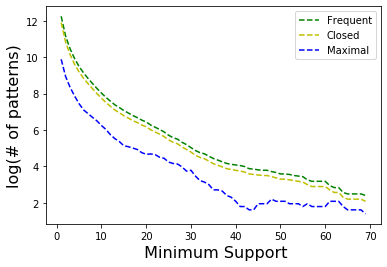

In [22]:
supp = list(range(1,70))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(supp, nf, "g--", label="Frequent")
ax.plot(supp, nc, "y--", label="Closed")
ax.plot(supp, nm, "b--", label="Maximal")
plt.xlabel(' Minimum Support', fontsize=16)
plt.ylabel('log(# of patterns)', fontsize=16)

_ = ax.legend(loc="best")

In [25]:

nf = []
nc = []
nm = []

for conf in range(1,100):
    nf.append((len(apriori(baskets, supp=10, zmin=2, target='s', conf= conf))))
    nc.append((len(apriori(baskets, supp=10, zmin=2, target='c', conf = conf))))
    nm.append((len(apriori(baskets, supp=10, zmin=2, target='m', conf = conf))))
    
    
    

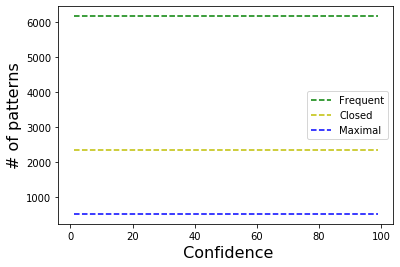

In [26]:
supp = list(range(1,100))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(supp, nf, "g--", label="Frequent")
ax.plot(supp, nc, "y--", label="Closed")
ax.plot(supp, nm, "b--", label="Maximal")
plt.xlabel(' Confidence', fontsize=16)
plt.ylabel('# of patterns', fontsize=16)

_ = ax.legend(loc="best")

In [23]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 9724


In [17]:
rules = apriori(baskets, supp=10, zmin=2, target='r', conf=60, 
                report='ascl') 
len(rules)

27183

In [25]:

n1 = []
n2 = []
n3 = []

for c in range(1,100):
    n1.append(math.log(len(apriori(baskets, supp=10, zmin=2, target='r',report = 'ascl', conf = c))))
    n2.append(math.log(len(apriori(baskets, supp=20, zmin=2, target='r',report = 'ascl', conf = c))))
    n3.append(math.log(len(apriori(baskets, supp=30, zmin=2, target='r',report = 'ascl', conf = c))))
    
    
    

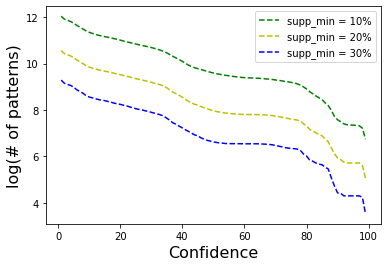

In [26]:
supp = list(range(1,100))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(supp, n1, "g--", label="supp_min = 10%")
ax.plot(supp, n2, "y--", label="supp_min = 20%")
ax.plot(supp, n3, "b--", label="supp_min = 30%")
plt.xlabel('Confidence', fontsize=16)
plt.ylabel('log(# of rules)', fontsize=16)

_ = ax.legend(loc="best")

In [27]:
rules[0]

('[0.0, 173276.2)_Balance',
 ('1 time bankrupt', '1 time credit problem'),
 6191,
 0.06751657651369744,
 0.6545089332910455,
 1.5622618478513046)

In [26]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

###### Confidence histogram

In [117]:
rules_h = apriori(baskets, supp=10, zmin=2, target='r', conf=60, 
                report='cl') 
rules_h[0]

('[0.0, 173276.2)_Balance',
 ('1 time bankrupt', '1 time credit problem', '0.0_tax Liens'),
 0.6545089332910455,
 1.5622618478513046)

In [118]:
rules_h[0][3]

1.5622618478513046

In [119]:
type(rules_h)

list

In [120]:
confid = []
for c in rules_h:
    confid.append(c[2])
    

confidence = pd.Series(confid)

In [32]:
len(confidence)

12040

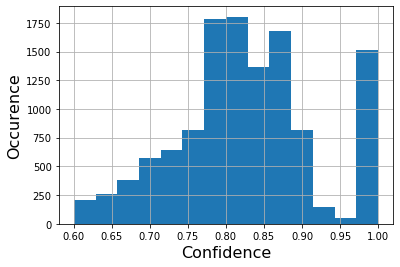

In [33]:
confidence.hist(bins = 14)
plt.xlabel('Confidence', fontsize=16)
plt.ylabel('Occurence', fontsize=16)
plt.show()

###### Lift Histogram

In [34]:
rules_h1 = apriori(baskets, supp=20, zmin=2, target='r', conf=60, 
                report='cl') 
rules_h1[0]

('Short Term',
 ('[1026.9, 1076.491)_Score',
  '[1099921.4, 1611568.6)_Income',
  '[10802.0, 10009721.7)_LoanAmount'),
 0.7569234097793163,
 1.0405200435224902)

In [35]:
lift = []
for l in rules_h1:
    lift.append(l[3])
    

lift = pd.Series(lift)

In [36]:
len(lift)

2466

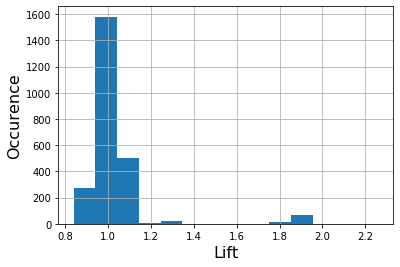

In [37]:
lift.hist(bins = 14)
plt.xlabel('Lift', fontsize=16)
plt.ylabel('Occurence', fontsize=16)
plt.show()

# Replace missing values with A.R

In [18]:
rules_h2 = apriori(baskets, supp=15, zmin=2, target='r', conf=50, 
                report='scl') 
len(rules_h2)

11927

In [39]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [20]:
rules_h2[0]

('Home Mortgage',
 ('[735869.2, 1103803.8)_OpenCredit', '0.0_tax Liens'),
 0.0906473564822893,
 0.5878359264497879,
 1.216918840288521)

In [19]:
def comp(lista):
    return lista[3],lista[2]

rules_h2.sort(key = comp, reverse = True)

In [20]:
rules_h2[0]

('0.0_tax Liens', ('No bankruptcies',), 0.8912384400628163, 1.0, 1.0)

In [24]:
df_m = pd.read_csv("credit.csv")

In [25]:
df_m["Purpose"].unique() #apparte due volte il termine other, si deve sostituire
purpose=df_m["Purpose"].replace("other", "Other")  #sostituito
df_m["Purpose"]=purpose

In [26]:
Ownership= df_m["Home Ownership"].replace ("HaveMortgage", "Home Mortgage")
df_m["Home Ownership"]= Ownership

In [27]:
df_m=df_m.dropna(axis=0, how='all') 
del df_m['Months since last delinquent'],df_m['Loan ID'],df_m['Customer ID']
df_m.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [28]:
df_m.isna().sum()[df_m.isna().sum() > 0]

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies              204
Tax Liens                  10
dtype: int64

In [29]:
df_m.iloc[0].to_list()

['Fully Paid',
 445412.0,
 'Short Term',
 709.0,
 1167493.0,
 '8 years',
 'Home Mortgage',
 'Home Improvements',
 5214.74,
 17.2,
 6.0,
 1.0,
 228190.0,
 416746.0,
 1.0,
 0.0]

In [30]:
df_m[df_m.isna().any(axis=1)]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
7,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
11,Fully Paid,541970.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,23568.55,23.2,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,Fully Paid,449020.0,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.4,8.0,0.0,334533.0,428956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,Fully Paid,484968.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,20941.80,23.7,15.0,0.0,804175.0,1322662.0,0.0,0.0
99988,Charged Off,309474.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0
99989,Charged Off,429132.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,28948.02,16.3,16.0,0.0,485279.0,656414.0,0.0,0.0
99992,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0


In [31]:
df_m

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [32]:
df_srm = df_m.copy()

In [33]:
rules_h2[4]

('No bankruptcies',
 ('No credit problem',),
 0.8769739138021287,
 1.0,
 1.1220341886616987)

In [33]:

for i in range(100000):
    if df_srm['Number of Credit Problems'][i] == 0.0 and math.isnan(df_srm['Bankruptcies'][i]) :
        df_srm['Bankruptcies'][i] = 0.0        

C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df_srm.isna().sum()[df_srm.isna().sum() > 0]

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies                8
Tax Liens                  10
dtype: int64

In [40]:
cons = []

for l in range(len(rules_h2)):
    if (rules_h2[l][0] != '[1099921.4, 1611568.6)_Income' and rules_h2[l][0] !='0.0_tax Liens'
       and rules_h2[l][0] != '[10802.0, 10009721.7)_LoanAmount'):
        print(l,rules_h2[l])
       
        
        
    


3 ('No bankruptcies', ('No credit problem', '0.0_tax Liens'), 0.8769739138021287, 1.0, 1.1220341886616987)
4 ('No bankruptcies', ('No credit problem',), 0.8769739138021287, 1.0, 1.1220341886616987)
10 ('No bankruptcies', ('No credit problem', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.7716149014133659, 1.0, 1.1220341886616987)
11 ('No bankruptcies', ('No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.7716149014133659, 1.0, 1.1220341886616987)
16 ('No bankruptcies', ('Fully Paid', 'No credit problem', '0.0_tax Liens'), 0.7097147094747862, 1.0, 1.1220341886616987)
17 ('No bankruptcies', ('Fully Paid', 'No credit problem'), 0.7097147094747862, 1.0, 1.1220341886616987)
22 ('No bankruptcies', ('Debt Consolidation', 'No credit problem', '0.0_tax Liens'), 0.6916441284243587, 1.0, 1.1220341886616987)
23 ('No bankruptcies', ('Debt Consolidation', 'No credit problem'), 0.6916441284243587, 1.0, 1.1220341886616987)
29 ('No bankruptcies', ('Short Term', 'No credit problem', '0

1722 ('No bankruptcies', ('[7.6, 11.4)_OpenAccounts', 'Short Term', 'Debt Consolidation', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.15415067178502878, 1.0, 1.1220341886616987)
1723 ('No bankruptcies', ('[7.6, 11.4)_OpenAccounts', 'Short Term', 'Debt Consolidation', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.15415067178502878, 1.0, 1.1220341886616987)
1735 ('No bankruptcies', ('[7.6, 11.4)_OpenAccounts', 'Home Mortgage', 'No credit problem', '0.0_tax Liens'), 0.1527874716454371, 1.0, 1.1220341886616987)
1736 ('No bankruptcies', ('[7.6, 11.4)_OpenAccounts', 'Home Mortgage', 'No credit problem'), 0.1527874716454371, 1.0, 1.1220341886616987)
1752 ('No bankruptcies', ('[16998.6, 25497.9)_DebtM', 'Short Term', 'No credit problem', '0.0_tax Liens'), 0.1521985691851335, 1.0, 1.1220341886616987)
1753 ('No bankruptcies', ('[16998.6, 25497.9)_DebtM', 'Short Term', 'No credit problem'), 0.1521985691851335, 1.0, 1.1220341886616987)
1758 ('No bankr

2287 ('No credit problem', ('[0.0, 173276.2)_Balance', 'Rent', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.1562009247949747, 0.9779461969138331, 1.1151371569012105)
2288 ('No credit problem', ('[0.0, 173276.2)_Balance', 'Rent', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.1562009247949747, 0.9779461969138331, 1.1151371569012105)
2289 ('No credit problem', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'Debt Consolidation', 'No bankruptcies', '0.0_tax Liens'), 0.18173093700924794, 0.9779342723004695, 1.115123559446171)
2290 ('No credit problem', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'Debt Consolidation', 'No bankruptcies'), 0.18173093700924794, 0.9779342723004695, 1.115123559446171)
2291 ('No credit problem', ('[683.2, 732.3)_Score', 'Home Mortgage', 'No bankruptcies', '0.0_tax Liens'), 0.16518714011516314, 0.977730441518203, 1.1148911343089367)
2292 ('No credit problem', ('[683.2, 732.3)_Score', 'Home Mortgage', 'No bankruptcies'), 0.165

2921 ('No bankruptcies', ('Rent', 'Short Term', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount'), 0.2049925841912406, 0.8896303658478868, 0.9981956857529438)
2926 ('No bankruptcies', ('[3.8, 7.6)_OpenAccounts', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.14085674402373058, 0.8895316804407714, 0.9980849573522383)
2927 ('No bankruptcies', ('[3.8, 7.6)_OpenAccounts', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount'), 0.14085674402373058, 0.8895316804407714, 0.9980849573522383)
2928 ('No bankruptcies', ('Rent', 'Short Term', 'Debt Consolidation', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.161141162100855, 0.889477486154587, 0.9980241495103094)
2929 ('No bankruptcies', ('Rent', 'Short Term', 'Debt Consolidation', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount'), 0.161141162100855, 0.889477486154587, 0.9980241495103094)
2930 ('No credit problem', ('Long Term', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.

3899 ('No credit problem', ('Short Term', 'Fully Paid'), 0.5293033502006631, 0.8718810067005587, 0.994192635583093)
3900 ('No credit problem', ('Short Term', 'Debt Consolidation', '0.0_tax Liens'), 0.4918207991624498, 0.8718464244978444, 0.9941532020239302)
3901 ('No credit problem', ('Short Term', 'Debt Consolidation'), 0.4918207991624498, 0.8718464244978444, 0.9941532020239302)
3902 ('No credit problem', ('Short Term', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.42617998604083057, 0.8718320542566482, 0.9941368158567135)
3903 ('No credit problem', ('Short Term', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount'), 0.42617998604083057, 0.8718320542566482, 0.9941368158567135)
3904 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', '0.0_tax Liens'), 0.22680378642470772, 0.8717723004694836, 1.076606503216832)
3905 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term'), 0.22680378642470772, 0.8717723004694836, 1.076606503216832)
3910 ('No credit pr

4937 ('Short Term', ('[0.0, 8499.3)_DebtM', 'No bankruptcies'), 0.138261210957948, 0.8415532691669433, 1.156858187957724)
4938 ('Short Term', ('[0.0, 8499.3)_DebtM', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.13563296108881523, 0.8414749661705007, 1.156750547163142)
4939 ('Short Term', ('[0.0, 8499.3)_DebtM', 'No credit problem', 'No bankruptcies'), 0.13563296108881523, 0.8414749661705007, 1.156750547163142)
4940 ('Short Term', ('[0.0, 8499.3)_DebtM', 'No credit problem', '0.0_tax Liens'), 0.13563296108881523, 0.8414749661705007, 1.156750547163142)
4941 ('Short Term', ('[0.0, 8499.3)_DebtM', 'No credit problem'), 0.13563296108881523, 0.8414749661705007, 1.156750547163142)
4942 ('Debt Consolidation', ('[173276.2, 346552.4)_Balance', 'Short Term', 'Fully Paid', '0.0_tax Liens'), 0.15687707206421217, 0.8414741152383738, 1.0689915554294531)
4943 ('Debt Consolidation', ('[173276.2, 346552.4)_Balance', 'Short Term', 'Fully Paid'), 0.15687707206421217, 0.8414741152383738, 1.0

5523 ('Debt Consolidation', ('[367934.6, 735869.2)_OpenCredit', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.17236302564997383, 0.8256712987148679, 1.0489159795921104)
5524 ('Debt Consolidation', ('Long Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.13108532542313733, 0.8256061542688371, 1.0488332214163936)
5525 ('Debt Consolidation', ('Long Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.13108532542313733, 0.8256061542688371, 1.0488332214163936)
5526 ('Debt Consolidation', ('Long Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.13108532542313733, 0.8256061542688371, 1.0488332214163936)
5527 ('Debt Consolidation', ('Long Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.13108532542313733, 0.8256061542688371, 1.0488332214163936)
5528 ('Debt Consolidation', ('[

6039 ('Fully Paid', ('Short Term', 'Debt Consolidation', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.3455330657825859, 0.8107679316256813, 1.0012683671158042)
6040 ('Fully Paid', ('Short Term', 'Debt Consolidation', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.3455330657825859, 0.8107679316256813, 1.0012683671158042)
6041 ('Fully Paid', ('Short Term', 'Debt Consolidation', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.3455330657825859, 0.8107679316256813, 1.0012683671158042)
6042 ('Fully Paid', ('[0.0, 173276.2)_Balance', 'Debt Consolidation', '0.0_tax Liens'), 0.2359972081661141, 0.8107298066836506, 1.0012212842244312)
6043 ('Fully Paid', ('[0.0, 173276.2)_Balance', 'Debt Consolidation'), 0.2359972081661141, 0.8107298066836506, 1.0012212842244312)
6044 ('Short Term', ('[0.0, 173276.2)_Balance', 'Debt Consolidation', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.18731460478101553, 0.810609278

6546 ('Fully Paid', ('[0.0, 173276.2)_Balance', 'Short Term', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.13449877857267492, 0.803766944734098, 0.9926224076005098)
6547 ('Debt Consolidation', ('[732.3, 781.4)_Score', 'No bankruptcies', '0.0_tax Liens'), 0.2069992147967196, 0.8036666948937251, 1.020961779647756)
6548 ('Debt Consolidation', ('[732.3, 781.4)_Score', 'No bankruptcies'), 0.2069992147967196, 0.8036666948937251, 1.020961779647756)
6549 ('Fully Paid', ('10+ years', 'Home Mortgage', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.1455679637061595, 0.803660665904028, 0.9924911571816262)
6550 ('Fully Paid', ('10+ years', 'Home Mortgage', '[10802.0, 10009721.7)_LoanAmount'), 0.1455679637061595, 0.803660665904028, 0.9924911571816262)
6551 ('Short Term', ('[0.0, 173276.2)_Balance', '0.0_tax Liens'), 0.336688623276915, 0.803649521032903, 1.1047530355096107)
6552 ('Short Term', ('[0.0, 173276.2)_Balance',), 0.336688623276915, 0.8036495210329

7036 ('No credit problem', ('[0.0, 173276.2)_Balance', 'Short Term', 'Debt Consolidation', 'Fully Paid'), 0.15537209911010294, 0.793970129291128, 0.905352048442197)
7037 ('Debt Consolidation', ('[7.6, 11.4)_OpenAccounts', 'Short Term', 'Fully Paid', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.14889417204676322, 0.7939637124912771, 1.008635308681077)
7038 ('Debt Consolidation', ('[7.6, 11.4)_OpenAccounts', 'Short Term', 'Fully Paid', 'No credit problem', 'No bankruptcies'), 0.14889417204676322, 0.7939637124912771, 1.008635308681077)
7039 ('Debt Consolidation', ('[7.6, 11.4)_OpenAccounts', 'Short Term', 'Fully Paid', 'No credit problem', '0.0_tax Liens'), 0.14889417204676322, 0.7939637124912771, 1.008635308681077)
7040 ('Debt Consolidation', ('[7.6, 11.4)_OpenAccounts', 'Short Term', 'Fully Paid', 'No credit problem'), 0.14889417204676322, 0.7939637124912771, 1.008635308681077)
7041 ('Debt Consolidation', ('[13.8, 19.2)_Years_History', 'Fully Paid', '[10802.0, 10009721.7)

7481 ('No credit problem', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Debt Consolidation', 'Fully Paid'), 0.13459692898272552, 0.786064581873766, 0.896337473101994)
7482 ('Debt Consolidation', ('[13.8, 19.2)_Years_History', '[683.2, 732.3)_Score', '0.0_tax Liens'), 0.12888239399755713, 0.7860325906218822, 0.9985597732012208)
7483 ('Debt Consolidation', ('[13.8, 19.2)_Years_History', '[683.2, 732.3)_Score'), 0.12888239399755713, 0.7860325906218822, 0.9985597732012208)
7484 ('Fully Paid', ('[0.0, 173276.2)_Balance', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.23977054615250393, 0.786000286000286, 0.9706812420886495)
7485 ('Fully Paid', ('[0.0, 173276.2)_Balance', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.23977054615250393, 0.786000286000286, 0.9706812420886495)
7486 ('[0.0, 173276.2)_Balance', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'Debt Consolidation', '0.0_tax Liens'), 0.1760927412318967, 0.7859715732087228, 1.8760529

7916 ('Fully Paid', ('[588274.2, 1099921.4)_Income', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.1513261210957948, 0.7765838370270876, 0.9590522763641187)
7917 ('Fully Paid', ('[588274.2, 1099921.4)_Income', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount'), 0.1513261210957948, 0.7765838370270876, 0.9590522763641187)
7918 ('Fully Paid', ('[173276.2, 346552.4)_Balance', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.21618173093700924, 0.7765807412050458, 0.9590484531385574)
7919 ('Fully Paid', ('[173276.2, 346552.4)_Balance', '[10802.0, 10009721.7)_LoanAmount'), 0.21618173093700924, 0.7765807412050458, 0.9590484531385574)
7920 ('Short Term', ('Rent', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.29204109230500785, 0.7764729761076317, 1.0673942494777733)
7921 ('Short Term', ('Rent', '[10802.0, 10009721.7)_LoanAmount'), 0.29204109230500785, 0.7764729761076317, 1.0673942494777733)
7922 ('Short Term', ('[588274.2, 1099921.4)_Incom

8404 ('Debt Consolidation', ('[683.2, 732.3)_Score', 'Short Term', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.16574332577211656, 0.7543180464562239, 0.9582702630624814)
8405 ('Debt Consolidation', ('[683.2, 732.3)_Score', 'Short Term', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.16574332577211656, 0.7543180464562239, 0.9582702630624814)
8406 ('[0.0, 173276.2)_Balance', ('[0.0, 8499.3)_DebtM', 'Short Term', '0.0_tax Liens'), 0.11985255627290176, 0.7541861103486138, 1.8001835062090403)
8407 ('[0.0, 173276.2)_Balance', ('[0.0, 8499.3)_DebtM', 'Short Term'), 0.11985255627290176, 0.7541861103486138, 1.8001835062090403)
8408 ('Short Term', ('[588274.2, 1099921.4)_Income', 'No bankruptcies', '0.0_tax Liens'), 0.1901391554702495, 0.7541089965397924, 1.0366511535547014)
8409 ('Short Term', ('[588274.2, 1099921.4)_Income', 'No bankruptcies'), 0.1901391554702495, 0.7541089965397924, 1.0366511535547014)
8410 ('Debt Consolidation', ('[683.2, 732.3)_Scor

8911 ('[0.0, 367934.6)_OpenCredit', ('[0.0, 173276.2)_Balance', 'No credit problem', '0.0_tax Liens'), 0.24431818181818182, 0.7232606941081517, 1.8848973314463857)
8912 ('[0.0, 367934.6)_OpenCredit', ('[0.0, 173276.2)_Balance', 'No credit problem'), 0.24431818181818182, 0.7232606941081517, 1.8848973314463857)
8913 ('Short Term', ('No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.6342588553481068, 0.7232357147298389, 0.9942105735468235)
8914 ('Short Term', ('No credit problem', 'No bankruptcies'), 0.6342588553481068, 0.7232357147298389, 0.9942105735468235)
8915 ('Short Term', ('No credit problem', '0.0_tax Liens'), 0.6342588553481068, 0.7232357147298389, 0.9942105735468235)
8916 ('Short Term', ('No credit problem',), 0.6342588553481068, 0.7232357147298389, 0.9942105735468235)
8917 ('Debt Consolidation', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.18173093700924794, 0.7229814742505097, 0.9184609207934988)
8918 ('Debt 

9374 ('Short Term', ('[11.4, 15.2)_OpenAccounts', 'No bankruptcies'), 0.14331050427499564, 0.6970982971725638, 0.9582802449258726)
9375 ('Short Term', ('[13.8, 19.2)_Years_History', '[1099921.4, 1611568.6)_Income', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.11462877333798639, 0.6970159151193634, 0.958166996773584)
9376 ('Short Term', ('[13.8, 19.2)_Years_History', '[1099921.4, 1611568.6)_Income', '[10802.0, 10009721.7)_LoanAmount'), 0.11462877333798639, 0.6970159151193634, 0.958166996773584)
9377 ('Debt Consolidation', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Short Term', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.1223063165241668, 0.6969734634267603, 0.8854208742363565)
9378 ('Debt Consolidation', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Short Term', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.1223063165241668, 0.6969734634267603, 0.8854208742363565)

9892 ('Short Term', ('[683.2, 732.3)_Score', 'Debt Consolidation', 'No credit problem'), 0.18385752922701099, 0.6470294749769727, 0.8894521278707197)
9893 ('[0.0, 367934.6)_OpenCredit', ('[0.0, 8499.3)_DebtM', 'Short Term', '0.0_tax Liens'), 0.10253446169952887, 0.6452099917650288, 1.681488571973457)
9894 ('[0.0, 367934.6)_OpenCredit', ('[0.0, 8499.3)_DebtM', 'Short Term'), 0.10253446169952887, 0.6452099917650288, 1.681488571973457)
9895 ('Short Term', ('[683.2, 732.3)_Score', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.16574332577211656, 0.6450490216883833, 0.8867296577827116)
9896 ('Short Term', ('[683.2, 732.3)_Score', 'Debt Consolidation', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.16574332577211656, 0.6450490216883833, 0.8867296577827116)
9897 ('Short Term', ('[683.2, 732.3)_Score', 'Debt Consolidation', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.162340778223695

10420 ('Rent', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.09773599720816611, 0.560580471633202, 1.3156975332585448)
10421 ('Rent', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.09773599720816611, 0.560580471633202, 1.3156975332585448)
10422 ('Rent', ('[0.0, 367934.6)_OpenCredit', 'Short Term', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.09773599720816611, 0.560580471633202, 1.3156975332585448)
10423 ('Rent', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Short Term', 'Fully Paid', 'No bankruptcies', '0.0_tax Liens'), 0.09380998080614203, 0.5605004235355444, 1.3155096582076653)
10424 ('Rent', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Short Term', 'Fully Paid', 'No bankruptcies'), 0.09380998080614203, 0.5605004235355444, 1.3155096582076653)
10425 (

10872 ('Rent', ('[0.0, 367934.6)_OpenCredit', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.11436703891118478, 0.5345056065239552, 1.254499119399539)
10873 ('Rent', ('[0.0, 367934.6)_OpenCredit', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.11436703891118478, 0.5345056065239552, 1.254499119399539)
10874 ('Rent', ('[0.0, 367934.6)_OpenCredit', 'Fully Paid', 'No credit problem', '[10802.0, 10009721.7)_LoanAmount'), 0.11436703891118478, 0.5345056065239552, 1.254499119399539)
10875 ('Home Mortgage', ('[13.8, 19.2)_Years_History', '[1099921.4, 1611568.6)_Income', 'No bankruptcies', '0.0_tax Liens'), 0.08490010469377073, 0.5345005149330587, 1.1065056038583498)
10876 ('Home Mortgage', ('[13.8, 19.2)_Years_History', '[1099921.4, 1611568.6)_Income', 'No bankruptcies'), 0.08490010469377073, 0.5345005149330587, 1.1065056038583498)
10877 ('Rent', ('[0.0, 173276.2)_Balance', 'Short Term', 'Fully Paid', 'No 

11456 ('Rent', ('[683.2, 732.3)_Score', 'Short Term', 'Debt Consolidation', 'Fully Paid', 'No credit problem', 'No bankruptcies'), 0.07941458733205374, 0.5139026111503175, 1.2061433318497918)
11457 ('Rent', ('[683.2, 732.3)_Score', 'Short Term', 'Debt Consolidation', 'Fully Paid', 'No credit problem', '0.0_tax Liens'), 0.07941458733205374, 0.5139026111503175, 1.2061433318497918)
11458 ('Rent', ('[683.2, 732.3)_Score', 'Short Term', 'Debt Consolidation', 'Fully Paid', 'No credit problem'), 0.07941458733205374, 0.5139026111503175, 1.2061433318497918)
11459 ('Home Mortgage', ('[13.8, 19.2)_Years_History', 'Debt Consolidation', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.09692898272552783, 0.5138760407030527, 1.0638094872512558)
11460 ('Home Mortgage', ('[13.8, 19.2)_Years_History', 'Debt Consolidation', 'Fully Paid', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.09692898272552783, 0.5138760407030527, 1.0638094872512558)
11461 ('Home

In [40]:
cons = []

for l in range(len(rules_h2)):
    if (rules_h2[l][0] in ['[1099921.4, 1611568.6)_Income', '[2123215.8, 2634863.0)_Income',
       '[588274.2, 1099921.4)_Income', '[1611568.6, 2123215.8)_Income',
       '[76627.0, 588274.2)_Income', '[2634863.0, 3146510.2)_Income',
       '[4681451.8, 5198215.472)_Income', '[3658157.4, 4169804.6)_Income',
       '[3146510.2, 3658157.4)_Income', '[4169804.6, 4681451.8)_Income']):
        print(l,rules_h2[l])
       
        
        
    


921 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score', '[10802.0, 10009721.7)_LoanAmount', '0.0_tax Liens'), 0.20162275344616995, 1.0, 2.259635288319369)
923 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score', '[10802.0, 10009721.7)_LoanAmount'), 0.20162275344616995, 1.0, 2.259635288319369)
925 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score', '0.0_tax Liens'), 0.20162275344616995, 1.0, 2.259635288319369)
926 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score',), 0.20162275344616995, 1.0, 2.259635288319369)
1191 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies', '0.0_tax Liens'), 0.18050950968417379, 1.0, 2.259635288319369)
1193 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score', '[10802.0, 10009721.7)_LoanAmount', 'No bankruptcies'), 0.18050950968417379, 1.0, 2.259635288319369)
1195 ('[1099921.4, 1611568.6)_Income', ('[1026.9, 1076.491)_Score', 'No bankruptcies',

In [39]:
df['Annual Income Bin'].unique()

array(['[1099921.4, 1611568.6)_Income', '[2123215.8, 2634863.0)_Income',
       '[588274.2, 1099921.4)_Income', '[1611568.6, 2123215.8)_Income',
       '[76627.0, 588274.2)_Income', '[2634863.0, 3146510.2)_Income',
       '[4681451.8, 5198215.472)_Income', '[3658157.4, 4169804.6)_Income',
       '[3146510.2, 3658157.4)_Income', '[4169804.6, 4681451.8)_Income'],
      dtype=object)

In [36]:
rules_h2[0]

('0.0_tax Liens', ('No bankruptcies',), 0.8912384400628163, 1.0, 1.0)

In [37]:
from numpy import mean
x = '0.0_tax Liens'
for i in range(100000):
    if math.isnan(df_srm['Tax Liens'][i]) and (df_srm['Bankruptcies'][i]== 0.0):
        
        df_srm['Tax Liens'][i] = x       

C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gianmarco\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
df_srm.isna().sum()[df_srm.isna().sum() > 0] 

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies                8
Tax Liens                   2
dtype: int64

In [143]:
#tax liens sostituito 8 su 10 missing value

In [42]:
rules_h2[921]

('[1099921.4, 1611568.6)_Income',
 ('[1026.9, 1076.491)_Score',
  '[10802.0, 10009721.7)_LoanAmount',
  '0.0_tax Liens'),
 0.20162275344616995,
 1.0,
 2.259635288319369)

In [44]:
from numpy import mean
x = mean(range(1099921, 1611569))  
for i in range(100000):
    if math.isnan(df_srm['Annual Income'][i]) and (df_srm['Credit Score'][i]<= 1077 and df_srm['Credit Score'][i]>= 1026) and (df_srm['Current Loan Amount'][i] <= 10009722 and df_srm['Current Loan Amount'][i] >= 10802) and (df_srm['Tax Liens'][i]=='0.0_tax Liens'):
        
        df_srm['Annual Income'][i] = x       

In [45]:
df_srm.isna().sum()[df_srm.isna().sum() > 0] 

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies                8
Tax Liens                   2
dtype: int64

In [37]:
rules_h2[144]

('[1099921.4, 1611568.6)_Income',
 ('[1026.9, 1076.491)_Score',),
 0.20162275344616995,
 1.0,
 2.259635288319369)

In [40]:
from numpy import mean
x = mean(range(1099921, 1611569))  
for i in range(100000):
    if math.isnan(df_srm['Annual Income'][i]) and (df_srm['Credit Score'][i]<= 1611569 and df_srm['Credit Score'][i]>= 1099921):
        
        df_srm['Annual Income'][i] = x       

In [41]:
df_srm.isna().sum()[df_srm.isna().sum() > 0] 

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies                8
Tax Liens                  10
dtype: int64

In [44]:
rules_h2[2498]

('[0.0, 367934.6)_OpenCredit',
 ('[0.0, 173276.2)_Balance',
  '[683.2, 732.3)_Score',
  '[10802.0, 10009721.7)_LoanAmount'),
 0.12890420519979062,
 0.8087581252138214,
 2.107713089373499)

In [57]:
from numpy import mean
x = mean(range(0, 367935))  
for i in range(100000):
    if (math.isnan(df_srm['Maximum Open Credit'][i]) and (df_srm['Current Credit Balance'][i]<= 173277) and (df_srm['Current Credit Balance'][i]>=0)and (df_srm['Credit Score'][i]>= 683) and (df_srm['Credit Score'][i]>= 733) and (df_srm['Current Loan Amount'][i]>= 10802) and (df_srm['Current Loan Amount'][i]>= 10009722)):
        df_srm['Maximum Open Credit'][i] = x
     
               

In [149]:
df_srm.isna().sum()[df_srm.isna().sum() > 0] 

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies                8
Tax Liens                   2
dtype: int64

In [64]:
rules_h2[4501]

('[683.2, 732.3)_Score',
 ('[588274.2, 1099921.4)_Income', '[10802.0, 10009721.7)_LoanAmount'),
 0.14189277612982026,
 0.5763710463364933,
 1.370579587273958)

In [65]:
from numpy import mean
x = mean(range(693,733))  
for i in range(100000):
    if math.isnan(df_srm['Credit Score'][i]) and (df_srm['Annual Income'][i]<= 1099922 and df_srm['Annual Income'][i]>= 588274) and (df_srm['Current Loan Amount'][i] <= 10009722 and df_srm['Current Loan Amount'][i] >= 10802):
        
        df_srm['Credit Score'][i] = x       

In [66]:
df_srm.isna().sum()[df_srm.isna().sum() > 0] 

Credit Score            19154
Annual Income           19154
Years in current job     4222
Maximum Open Credit         2
Bankruptcies                8
Tax Liens                  10
dtype: int64

In [67]:
#Per quanto riguarda i missing value di credit score e annual income non riesco ad sostituirli perchè
#le regole che trovo dipendono l'un dall'altro ma essi sono nan contemporaneamente

In [73]:
rules_h2 = apriori(baskets, supp=15, zmin=2, target='r', conf=50, 
                report='scl') 
len(rules_h2)

5359

In [79]:
df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],
      dtype=object)

In [48]:
cons = []

for l in range(len(rules_h2)):
    if (rules_h2[l][0] in ['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year','6 years']):
        print(l,rules_h2[l])
    

In [78]:
#non trovo nessuna regola con conseguenza Years in current job

In [49]:
df_srm.to_csv (r'C:\Users\Gianmarco\Desktop\data_mining\credit_2020\export_dataframe.csv', index = False, header=True)

# TARGET VARIABLES

In [18]:
df_srm['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df_srm['Loan Status'].value_counts(),df_srm['Loan Status'].value_counts(normalize=True)

(Fully Paid     77361
 Charged Off    22639
 Name: Loan Status, dtype: int64,
 Fully Paid     0.77361
 Charged Off    0.22639
 Name: Loan Status, dtype: float64)

In [34]:
for l in range(len(rules_h2)):
    if (rules_h2[l][0] == 'Fully Paid'):
        print(l,rules_h2[l])
#Non ci sono regole con 'Charged Off' come conseguenza  

3772 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', 'Debt Consolidation', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.1659505321933345, 0.8748418995055767, 1.0803973443375536)
3773 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', 'Debt Consolidation', 'No credit problem', 'No bankruptcies'), 0.1659505321933345, 0.8748418995055767, 1.0803973443375536)
3774 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', 'Debt Consolidation', 'No credit problem', '0.0_tax Liens'), 0.1659505321933345, 0.8748418995055767, 1.0803973443375536)
3775 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', 'Debt Consolidation', 'No credit problem'), 0.1659505321933345, 0.8748418995055767, 1.0803973443375536)
3816 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', 'Debt Consolidation', 'No bankruptcies', '0.0_tax Liens'), 0.16731373233292618, 0.874138225742123, 1.0795283333016796)
3817 ('Fully Paid', ('[732.3, 781.4)_Score', 'Short Term', 'Debt Consolidation', 'No bankruptcies'

6971 ('Fully Paid', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Debt Consolidation', 'No credit problem', 'No bankruptcies', '0.0_tax Liens'), 0.13459692898272552, 0.7947710734754331, 0.9815128397764755)
6972 ('Fully Paid', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Debt Consolidation', 'No credit problem', 'No bankruptcies'), 0.13459692898272552, 0.7947710734754331, 0.9815128397764755)
6973 ('Fully Paid', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Debt Consolidation', 'No credit problem', '0.0_tax Liens'), 0.13459692898272552, 0.7947710734754331, 0.9815128397764755)
6974 ('Fully Paid', ('[0.0, 367934.6)_OpenCredit', '[0.0, 173276.2)_Balance', 'Debt Consolidation', 'No credit problem'), 0.13459692898272552, 0.7947710734754331, 0.9815128397764755)
6975 ('Fully Paid', ('[0.0, 367934.6)_OpenCredit', 'No bankruptcies', '0.0_tax Liens'), 0.25557276217065084, 0.7947300596852958, 0.9814621892646852)
6976 ('Fully Paid', ('[0.0, 367934.6)_OpenCredi

In [35]:
rules_h2[3772]

('Fully Paid',
 ('[732.3, 781.4)_Score',
  'Short Term',
  'Debt Consolidation',
  'No credit problem',
  'No bankruptcies',
  '0.0_tax Liens'),
 0.1659505321933345,
 0.8748418995055767,
 1.0803973443375536)

In [36]:
# Data Partitioning

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_lift_curve

In [37]:
df.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens,Current Loan Amount Bin,Credit Score Bin,Annual Income Bin,Monthly Debt Bin,Years of Credit History Bin,Current Credit Balance Bin,Maximum Open Credit Bin,Number of Open Accounts Bin
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements,1 time credit problem,1 time bankrupt,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[683.2, 732.3)_Score","[1099921.4, 1611568.6)_Income","[0.0, 8499.3)_DebtM","[13.8, 19.2)_Years_History","[173276.2, 346552.4)_Balance","[367934.6, 735869.2)_OpenCredit","[3.8, 7.6)_OpenAccounts"
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,No credit problem,No bankruptcies,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[1026.9, 1076.491)_Score","[1099921.4, 1611568.6)_Income","[25497.9, 33997.2)_DebtM","[19.2, 24.6)_Years_History","[173276.2, 346552.4)_Balance","[735869.2, 1103803.8)_OpenCredit","[34.2, 38.038)_OpenAccounts"
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation,1 time credit problem,No bankruptcies,0.0_tax Liens,"[90001079.3, 100099988.197)_LoanAmount","[732.3, 781.4)_Score","[2123215.8, 2634863.0)_Income","[25497.9, 33997.2)_DebtM","[13.8, 19.2)_Years_History","[173276.2, 346552.4)_Balance","[735869.2, 1103803.8)_OpenCredit","[15.2, 19.0)_OpenAccounts"
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation,No credit problem,No bankruptcies,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[683.2, 732.3)_Score","[588274.2, 1099921.4)_Income","[8499.3, 16998.6)_DebtM","[8.4, 13.8)_Years_History","[173276.2, 346552.4)_Balance","[367934.6, 735869.2)_OpenCredit","[7.6, 11.4)_OpenAccounts"
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation,No credit problem,No bankruptcies,0.0_tax Liens,"[10802.0, 10009721.7)_LoanAmount","[1026.9, 1076.491)_Score","[1099921.4, 1611568.6)_Income","[16998.6, 25497.9)_DebtM","[3.0, 8.4)_Years_History","[173276.2, 346552.4)_Balance","[367934.6, 735869.2)_OpenCredit","[11.4, 15.2)_OpenAccounts"


In [38]:
attributes = [col for col in df.columns if col != 'Loan Status']
X = df[attributes].values
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [39]:
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

In [161]:
rules_h2[3905],rules_h2[4296],rules_h2[5034],rules_h2[5049],rules_h2[5067],rules_h2[5071],rules_h2[5095],rules_h2[5103],rules_h2[5187],rules_h2[5195],rules_h2[5227],rules_h2[5295],rules_h2[5335],rules_h2[5411]

(('Fully Paid',
  ('[732.3, 781.4)_Score', 'Short Term'),
  0.22680378642470772,
  0.8717723004694836,
  1.076606503216832),
 ('Fully Paid',
  ('Home Mortgage',
   'Short Term',
   'Debt Consolidation',
   'No credit problem',
   'No bankruptcies',
   '0.0_tax Liens'),
  0.1864312510905601,
  0.860428830279847,
  1.0625977376611562),
 ('Fully Paid',
  ('[3.8, 7.6)_OpenAccounts', 'Short Term', '0.0_tax Liens'),
  0.1485670040132612,
  0.8388030293701126,
  1.0358906744932237),
 ('Fully Paid',
  ('[13.8, 19.2)_Years_History',
   'Short Term',
   'Debt Consolidation',
   'No credit problem'),
  0.1577277089513174,
  0.8381918284555201,
  1.0351358640007726),
 ('Fully Paid',
  ('[16998.6, 25497.9)_DebtM', 'Short Term', 'No credit problem'),
  0.1275082882568487,
  0.8377758670106048,
  1.0346221670222817),
 ('Fully Paid',
  ('[0.0, 173276.2)_Balance', '[683.2, 732.3)_Score'),
  0.15058454021985693,
  0.8376607619509828,
  1.0344800165367989),
 ('Fully Paid',
  ('[367934.6, 735869.2)_OpenCr

In [162]:
y_pred = []
for att in X_test:
    if (att[2]== 'Home Mortgage')or(att[8]=='[683.2, 732.3)_Score')or(att[14]=='[7.6, 11.4)_OpenAccounts' and att[8]=='[683.2, 732.3)_Score')or(att[1]=='10+ years' and att[8]=='[683.2, 732.3)_Score')or(att[0]=='Short Term')or(att[13]=='[367934.6, 735869.2)_OpenCredit'and att[0]=='Short Term') or(att[0]=='Short Term' and att[3]=='Debt Consolidation') or(att[12]=='[0.0, 173276.2)_Balance' and att[2]=='Home Mortgage')or(att[12]=='[0.0, 173276.2)_Balance' and att[8]== '[683.2, 732.3)_Score') or (att[10]=='[16998.6, 25497.9)_DebtM' and att[0]=='Short Term' and att[4]=='No credit problem') or(att[13] == '[367934.6, 735869.2)_OpenCredit' and att[0]=='Short Term' and att[3]=='Debt Consolidation' and att[4]=='No credit problem') or(att[11]== '[13.8, 19.2)_Years_History' and att[0]=='Short Term' and att[3]=='Debt Consolidation' and att[4]=='No credit problem') or (att[7]=='[3.8, 7.6)_OpenAccounts' and att[0]== 'Short Term' and att[6]=='0.0_tax Liens' ) or (att[8] == '[732.3, 781.4)_Score' and att[0] == 'Short Term') or (att[2]=='Home Mortgage' and att[0]=='Short Term' and att[5]=='No bankruptcies'):
        
        y_pred.append('Fully Paid')
    else:
        y_pred.append('Charged Off')

In [46]:
X_test[0]

array(['Short Term', '1 year', 'Home Mortgage', 'Debt Consolidation',
       'No credit problem', 'No bankruptcies', '0.0_tax Liens',
       '[10802.0, 10009721.7)_LoanAmount', '[683.2, 732.3)_Score',
       '[588274.2, 1099921.4)_Income', '[8499.3, 16998.6)_DebtM',
       '[13.8, 19.2)_Years_History', '[0.0, 173276.2)_Balance',
       '[367934.6, 735869.2)_OpenCredit', '[7.6, 11.4)_OpenAccounts'],
      dtype=object)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.35      0.12      0.17      5234
  Fully Paid       0.82      0.95      0.88     22275

    accuracy                           0.79     27509
   macro avg       0.59      0.53      0.53     27509
weighted avg       0.73      0.79      0.75     27509

